# Phase 3 Code Challenge

This assessment is designed to test your understanding of Module 3 material. It covers:

* Gradient Descent
* Logistic Regression
* Classification Metrics
* Decision Trees

_Read the instructions carefully_. You will be asked both to write code and to answer short answer questions.

## Code Tests

We have provided some code tests for you to run to check that your work meets the item specifications. Passing these tests does not necessarily mean that you have gotten the item correct - there are additional hidden tests. However, if any of the tests do not pass, this tells you that your code is incorrect and needs changes to meet the specification. To determine what the issue is, read the comments in the code test cells, the error message you receive, and the item instructions.

## Short Answer Questions 

For the short answer questions...

* _Use your own words_. It is OK to refer to outside resources when crafting your response, but _do not copy text from another source_.

* _Communicate clearly_. We are not grading your writing skills, but you can only receive full credit if your teacher is able to fully understand your response. 

* _Be concise_. You should be able to answer most short answer questions in a sentence or two. Writing unnecessarily long answers increases the risk of you being unclear or saying something incorrect.

In [1]:
# Run this cell without changes to import the necessary libraries

from numbers import Number

---
## Part 1: Gradient Descent [Suggested Time: 20 min]
---
In this part, you will describe how gradient descent works to calculate a parameter estimate. Below is an image of a best fit line from a linear regression model using TV advertising spending to predict product sales.

![best fit line](https://raw.githubusercontent.com/learn-co-curriculum/dsc-cc-images/main/phase_3/best_fit_line.png)

This best fit line can be described by the equation $y = mx + b$. Below is the RSS cost curve associated with the slope parameter $m$:

![cost curve](https://raw.githubusercontent.com/learn-co-curriculum/dsc-cc-images/main/phase_3/cost_curve.png)

where RSS is the residual sum of squares: $RSS = \sum_{i=1}^n(y_i - (mx_i + b))^2$ 

### 1.1) Short Answer: Explain how the RSS curve above could be used to find an optimal value for the slope parameter $m$. 

Your answer should provide a one sentence summary, not every step of the process.

# Your answer here

- Plot shows the error (RSS) on the y-axis and the slope of the model on the x-axis, its show witch slope has the lowest amount of error. For each point Graident descent find the parital derivative, and when the derivative is closet to 0, that is the optimal value for slope parameter.
- From this graph you can see that it arrived between 0.04 and 0.06 for the optimal coefficient value, since it's around that point that the error term (RSS) is smallest

Below is a visualization showing the iterations of a gradient descent algorithm applied the RSS curve. Each yellow marker represents an estimate, and the lines between markers represent the steps taken between estimates in each iteration. Numeric labels identify the iteration numbers.

![gradient descent](https://raw.githubusercontent.com/learn-co-curriculum/dsc-cc-images/main/phase_3/gd.png)

### 1.2) Short Answer: Explain why the distances between markers get smaller over successive iterations.

# Your answer here


- Becuase of the step size and learning rate
- Step size captures the amount to change the coefficient as it tries to minimize the error term
- Learning rate determines how large those steps are to start
- Gradient descent, take 1 point see the RSS, and it keep going down to check if the RSS is smaller, step size help with going faster down. 
- step size = learning rate * slope

### 1.3) Short Answer: What would be the effect of decreasing the learning rate for this application of gradient descent?

# Your answer here

- a smaller step size would be the effect of a smaller learning rate
- step size = learning rate * slope


---
## Part 2: Logistic Regression [Suggested Time: 15 min]
---
In this part, you will answer general questions about logistic regression.

### 2.1) Short Answer: Provide one reason why logistic regression is better than linear regression for modeling a binary target/outcome.

# Your answer here

- Logistic Regression is for classification problems (categorical targets), linear is not used for classification. Linaer is used to a continous varaible
- Linear regression predicts a continuous target, and is not bound between 0 and 1

### 2.2) Short Answer: Compare logistic regression to another classification model of your choice (e.g. KNN, Decision Tree, etc.). What is one advantage and one disadvantage logistic regression has when compared with the other model?

# Your answer here
### KNN vs. Logistics Regression

- Interpretable results: Logistic regression provides interpretable results by estimating the probabilities of class membership based on the input features

- KNN supports non-linear solutions where LR supports only linear solutions.


---
## Part 3: Classification Metrics [Suggested Time: 20 min]
---
In this part, you will make sense of classification metrics produced by various classifiers.

The confusion matrix below represents the predictions generated by a classisification model on a small testing dataset.

![cnf matrix](https://raw.githubusercontent.com/learn-co-curriculum/dsc-cc-images/main/phase_3/cnf_matrix.png)

### 3.1) Create a numeric variable `precision` containing the precision of the classifier.

In [2]:
# CodeGrade step3.1
# Replace None with appropriate code

precision = 30/(30+4)
print(precision)

0.8823529411764706


In [3]:
# This test confirms that you have created a numeric variable named precision

assert isinstance(precision, Number)

### 3.2) Create a numeric variable `f1score` containing the F-1 score of the classifier.

In [4]:
# CodeGrade step3.2
# Replace None with appropriate code
recall = 30 / (30+12)
print(recall)
f1score =  2 * precision * recall / (precision + recall)
print(f1score)

0.7142857142857143
0.7894736842105262


In [5]:
# This test confirms that you have created a numeric variable named f1score

assert isinstance(f1score, Number)

The ROC curves below were calculated for three different models applied to one dataset.

1. Only Age was used as a feature in the model
2. Only Estimated Salary was used as a feature in the model
3. All features were used in the model

![roc](https://raw.githubusercontent.com/learn-co-curriculum/dsc-cc-images/main/phase_3/many_roc.png)

### 3.3) Short Answer: Identify the best ROC curve in the above graph and explain why it is the best. 

# Your answer here
- the best Roc curve is the model with all features, because it is the only with reduce FP rate and high TP rates compared to other models. The best performace model should hug the upper left conner of the graph.


Run the following cells to load a sample dataset, run a classification model on it, and perform some EDA.

In [6]:
# Run this cell without changes

# Include relevant imports
import pickle, sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score

network_df = pickle.load(open('sample_network_data.pkl', 'rb'))

# partion features and target 
X = network_df.drop('Purchased', axis=1)
y = network_df['Purchased']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2019)

# scale features
scale = StandardScaler()
scale.fit(X_train)
X_train = scale.transform(X_train)
X_test = scale.transform(X_test)

# build classifier
model = LogisticRegression(C=1e5, solver='lbfgs')
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)

# get the accuracy score
print(f'The classifier has an accuracy score of {round(accuracy_score(y_test, y_test_pred), 3)}.')

The classifier has an accuracy score of 0.956.


In [7]:
# Run this cell without changes

y.value_counts()

0    257
1     13
Name: Purchased, dtype: int64

In [8]:
y.value_counts(normalize=True)

0    0.951852
1    0.048148
Name: Purchased, dtype: float64

### 3.4) Short Answer: Explain how the distribution of `y` shown above could explain the high accuracy score of the classification model.

# Your answer here
 - Imbalanced target - 95% of data is in class 0
- Predicting only our majority class, 0


### 3.5) Short Answer: What is one method you could use to improve your model to address the issue discovered in Question 3.4?

# Your answer here

- Target is imbalanced
- Oversampling, synthetic oversampling (SMOTE), set `class_weight`
- Note that undersampling doesn't make sense here, since our dataset is so small

---
## Part 4: Decision Trees [Suggested Time: 20 min]
---
In this part, you will use decision trees to fit a classification model to a wine dataset. The data contain the results of a chemical analysis of wines grown in one region in Italy using three different cultivars (grape types). There are thirteen features from the measurements taken, and the wines are classified by cultivar in the `target` variable.

In [9]:
# Run this cell without changes

# Relevant imports 
import pandas as pd 
import numpy as np 
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier

# Load the data 
wine = load_wine()
X, y = load_wine(return_X_y=True)
X = pd.DataFrame(X, columns=wine.feature_names)
y = pd.Series(y)
y.name = 'target'

### 4.1) Use `train_test_split()` to evenly split `X` and `y` data between training sets (`X_train` and `y_train`) and test sets (`X_test` and `y_test`), with `random_state=1`.

Do not alter `X` or `y` before performing the split.

In [10]:
# CodeGrade step4.1
# Replace None with appropriate code

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 1, test_size = 0.5)

In [11]:
# These tests confirm that you have created DataFrames named X_train, X_test and Series named y_train, and y_test

assert type(X_train) == pd.DataFrame
assert type(X_test) == pd.DataFrame
assert type(y_train) == pd.Series
assert type(y_test) == pd.Series

# These tests confirm that you have split the data evenly between train and test sets

assert X_train.shape[0] == X_test.shape[0]
assert y_train.shape[0] == y_test.shape[0]

### 4.2) Create an untuned decision tree classifier `wine_dt` and fit it using `X_train` and `y_train`, with `random_state=1`. 

Use parameter defaults for your classifier. You must use the Scikit-learn DecisionTreeClassifier (docs [here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html))

In [12]:
# CodeGrade step4.2
# Replace None with appropriate code

wine_dt = DecisionTreeClassifier(random_state=1)
wine_dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [13]:
# This test confirms that you have created a DecisionTreeClassifier named wine_dt

assert type(wine_dt) == DecisionTreeClassifier

# This test confirms that you have set random_state to 1

assert wine_dt.get_params()['random_state'] == 1

# This test confirms that wine_dt has been fit

sklearn.utils.validation.check_is_fitted(wine_dt)

### 4.3) Create an array `y_pred` generated by using `wine_dt` to make predictions for the test data.

In [14]:
# CodeGrade step4.3
# Replace None with appropriate code

y_pred = wine_dt.predict(X_test)

In [15]:
# This test confirms that you have created an array-like object named y_pred

assert type(np.asarray(y_pred)) == np.ndarray

### 4.4) Create a numeric variable `wine_dt_acc` containing the accuracy score for your predictions. 

Hint: You can use the `sklearn.metrics` module.

In [16]:
# CodeGrade step4.4
# Replace None with appropriate code
from sklearn.metrics import accuracy_score


wine_dt_acc = accuracy_score(y_test,y_pred)
print(round(wine_dt_acc,2)*100)

88.0


In [17]:
# This test confirms that you have created a numeric variable named wine_dt_acc

assert isinstance(wine_dt_acc, Number)

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.93      0.82      0.87        33
           1       0.81      0.88      0.85        34
           2       0.91      0.95      0.93        22

    accuracy                           0.88        89
   macro avg       0.88      0.89      0.88        89
weighted avg       0.88      0.88      0.88        89



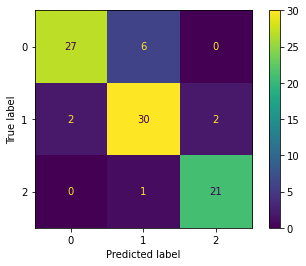

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
ct = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(ct).plot();

### 4.5) Short Answer: Based on the accuracy score, does the model seem to be performing well or to have substantial performance issues? Explain your answer.

# Your answer here

- Based on the accuracy score, I would say that the model is doing pretty well. Because without adding any hyperparamter/tunning the tree, we got a accuracy score of 88%, which is really good. 